# Analyzing Trader Behavior Against Bitcoin Market Sentiment: Fear vs Greed

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset



In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd

path1 = "/content/drive/MyDrive/DS_Saloni/CSV_file/historical_data.csv"
Trader_df = pd.read_csv(path1)
path2 = "/content/drive/MyDrive/DS_Saloni/CSV_file/fear_greed_index.csv"
Sentiment_df = pd.read_csv(path2)


In [47]:
Trader_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


In [48]:
Trader_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


Data cleaning



In [49]:
Trader_df['datetime'] = pd.to_datetime(Trader_df['Timestamp'], unit='ms')
Trader_df['date'] = Trader_df['datetime'].dt.date

Sentiment_df['date'] = pd.to_datetime(Sentiment_df['date']).dt.date

In [50]:
merged = pd.merge(
    Trader_df,
    Sentiment_df[['date','classification','value']],
    on='date',
    how='inner'
)

print("Merged dataset sample:")
print(merged.head())

Merged dataset sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \


EDA


In [51]:
daily_stats = merged.groupby(['date','classification']).agg({
    'Closed PnL':'mean',
    'Size USD':'sum',
    'Account':'nunique'
}).reset_index()

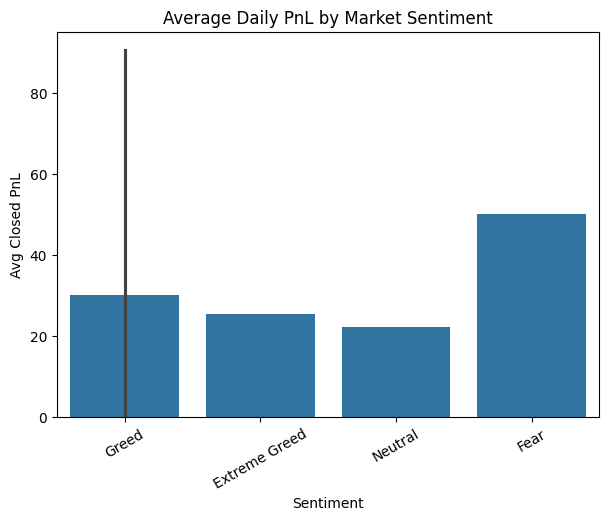

In [52]:
plt.figure(figsize=(7,5))
sns.barplot(x='classification', y='Closed PnL', data=daily_stats)
plt.title("Average Daily PnL by Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Sentiment")
plt.xticks(rotation=30)
plt.show()

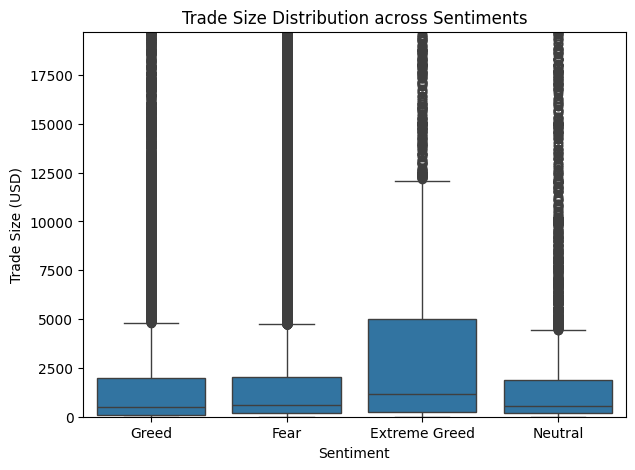

In [53]:
#  Trade Size Distribution by Sentiment
plt.figure(figsize=(7,5))
sns.boxplot(x='classification', y='Size USD', data=merged)
plt.ylim(0, merged['Size USD'].quantile(0.95))  # cut out outliers
plt.title("Trade Size Distribution across Sentiments")
plt.ylabel("Trade Size (USD)")
plt.xlabel("Sentiment")
plt.show()

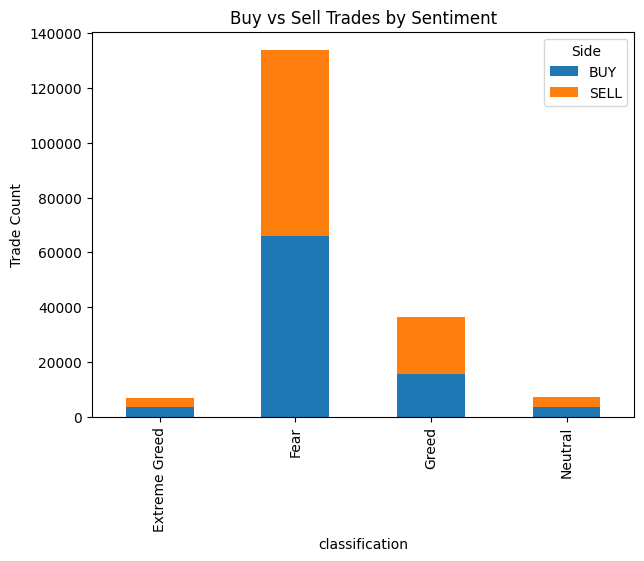

In [54]:
buy_sell = merged.groupby(['classification','Side']).size().unstack()
buy_sell.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Buy vs Sell Trades by Sentiment")
plt.ylabel("Trade Count")
plt.show()

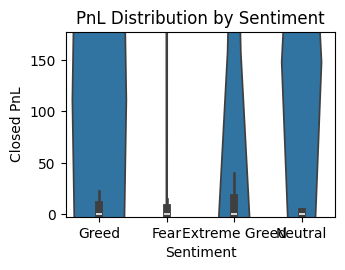

In [67]:
#PnL Distribution
plt.subplot(2,2,4)
sns.violinplot(x='classification', y='Closed PnL', data=merged)
plt.ylim(merged['Closed PnL'].quantile(0.05), merged['Closed PnL'].quantile(0.95))
plt.title("PnL Distribution by Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

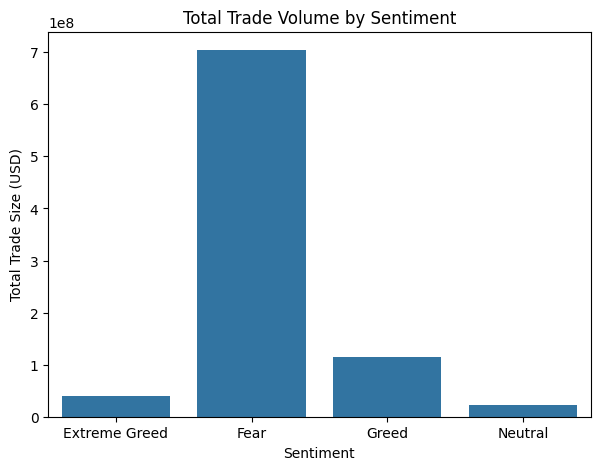

In [56]:
# Trade Volume by Sentiment
daily_volume = merged.groupby('classification')['Size USD'].sum().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='classification', y='Size USD', data=daily_volume)
plt.title("Total Trade Volume by Sentiment")
plt.ylabel("Total Trade Size (USD)")
plt.xlabel("Sentiment")
plt.show()


Correlation matrix:
               value  Closed PnL  Size USD
value       1.000000    0.011132 -0.024110
Closed PnL  0.011132    1.000000  0.136853
Size USD   -0.024110    0.136853  1.000000


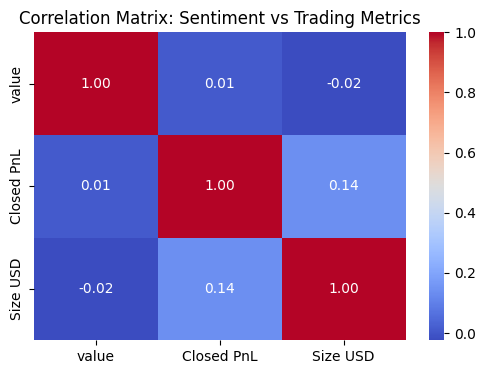

In [57]:
correlation = merged[['value','Closed PnL','Size USD']].corr()
print("Correlation matrix:")
print(correlation)

#Heatmap for visualization
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Sentiment vs Trading Metrics")
plt.show()

Hidden Patterns

In [ ]:
# Top vs Bottom Traders
trader_perf = merged.groupby(['Account']).agg({
    'Closed PnL':'mean',
    'Size USD':'sum'
}).reset_index()

# Top 10 profitable
top_traders = trader_perf.nlargest(10, 'Closed PnL')

# Bottom 10 losing
bottom_traders = trader_perf.nsmallest(10, 'Closed PnL')

print("Top Traders:", top_traders)
print("\nBottom Traders:\n", bottom_traders)

Top Traders:                                        Account  Closed PnL     Size USD
8   0x420ab45e0bd8863569a5efbb9c05d91f40624641  520.902331   1987527.61
0   0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768  61697263.97
9   0x430f09841d65beb3f27765503d0f850b8bce7713  396.329089   2712102.36
15  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  375.498408  10842259.34
16  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  289.899127   2959751.83
24  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0  174.691809    861809.40
11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  163.135945  37017401.44
7   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  161.133275   1143896.46
27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  141.632368  55900950.94
30  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  136.042638  18645667.53

Bottom Traders:
                                        Account  Closed PnL      Size USD
5   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  -44.902054  1.168624e+06
6   0x39cef799f8b69da1995852eea